In [6]:
# packages : numpy, pandas, sklearn, matplotlib, seaborn, scikit-learn, graphviz
# they are all necessary for the following code

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

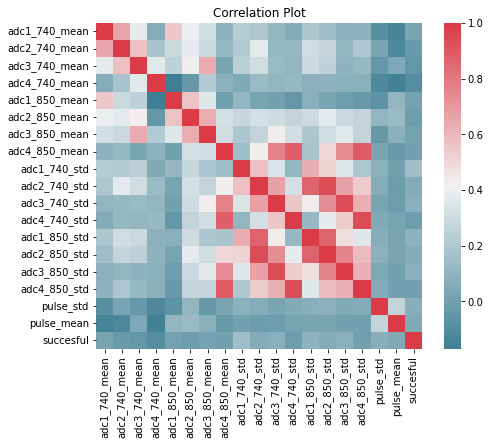

In [354]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

cor = dataset.corr()
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

#x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=42)
#fig, ax=plt.subplots(figsize=(8,6))


,adc1_740_mean,adc2_740_mean,adc3_740_mean,adc4_740_mean,adc1_850_mean,adc2_850_mean,adc3_850_mean,adc4_850_mean,adc1_740_std,adc2_740_std,adc3_740_std,adc4_740_std,adc1_850_std,adc2_850_std,adc3_850_std,adc4_850_std,pulse_std,pulse_mean,succesful
0,1043.282353,31.317647,53.858824,32.094118,922.802326,104.848837,135.500000,2.604651,0.069108,0.019982,0.014067,0.025143,0.014231,0.022813,0.014873,0.002928,0.176191,0.070399,1.0
1,734.568862,21.610778,40.934132,14.035928,810.766467,115.988024,139.568862,9.766467,0.088068,0.007083,0.022250,0.009025,0.029833,0.024425,0.007377,0.006550,0.135421,0.595964,0.0
2,1049.789809,271.439490,86.286624,36.503185,1071.859873,225.178344,141.694268,85.700637,0.326314,0.119503,0.023923,0.017600,0.099651,0.097110,0.021146,0.016531,0.156746,0.561602,1.0
3,1437.812500,136.968750,38.375000,15.437500,897.580645,110.161290,110.322581,29.967742,0.089237,0.025964,0.004590,0.002441,0.039638,0.029820,0.002072,0.006815,0.087688,0.133060,1.0
4,1034.600000,29.413333,37.466667,9.613333,488.773333,71.706667,101.693333,5.880000,0.129625,0.013676,0.015159,0.014182,0.003841,0.018437,0.014642,0.008608,0.099194,0.061675,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,1951.390805,139.137931,44.448276,23.689655,991.632184,114.252874,120.183908,54.563218,0.053017,0.023421,0.031658,0.006595,0.018381,0.018106,0.021384,0.020161,0.268230,0.217014,0.0
333,761.060241,22.963855,33.192771,11.987952,842.686747,138.783133,138.530120,7.855422,0.085404,0.011782,0.030694,0.008821,0.014429,0.022565,0.015222,0.004872,0.130810,0.954347,1.0
334,870.118280,58.258065,19.161290,15.623656,1194.967742,176.010753,70.440860,38.419355,0.056923,0.014483,0.013785,0.004121,0.028107,0.021999,0.019144,0.011392,0.494399,0.371999,1.0
335,866.388889,30.152778,37.055556,7.041667,805.647887,127.464789,120.549296,4.408451,0.240031,0.013256,0.012702,0.013646,0.048283,0.042212,0.013583,0.009782,0.392773,0.456245,0.0


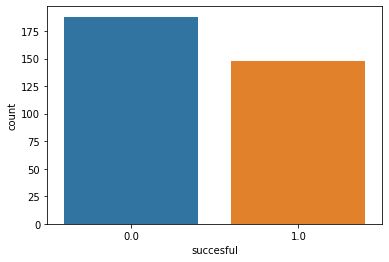

In [379]:
# actual datasets should implement in 'signal.csv'.
dataset = pd.read_csv('outfinal.csv')

dataset = dataset.drop(['rating'],axis = 1)
dataset2 = pd.read_csv('outfinal.csv')
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
scaler = MinMaxScaler()
dataset = clean_dataset(dataset)
dataset
scaler = MinMaxScaler()
features = [['adc1_740_std','adc2_740_std','adc3_740_std','adc4_740_std',
'adc1_850_std','adc2_850_std','adc3_850_std','adc4_850_std','pulse_mean','pulse_std']]

for feature in features:
    dataset[feature] = scaler.fit_transform(dataset[feature])
# analyze dataframe
#print(dataset.min())
#dataset = dataset.drop(dataset.adc1_740_mean[dataset.adc1_740_mean > 2200].index)
#dataset = dataset.drop(dataset.adc1_740_mean[dataset.adc1_740_mean > 2200].index)
#dataset = dataset.drop(dataset.adc2_740_mean[dataset.adc2_740_mean > 400].index)
#dataset = dataset.drop(dataset.adc3_740_std[dataset.adc3_740_std > 100].index)
#dataset = dataset.drop(dataset.adc4_740_std[dataset.adc4_740_std > 30].index)
#dataset = dataset.drop(dataset.adc1_850_mean[dataset.adc1_850_mean > 1800].index)
#dataset = dataset.drop(dataset.adc1_850_mean[dataset.adc1_850_mean < 500].index)
#dataset = dataset.drop(dataset.adc2_850_mean[dataset.adc2_850_mean > 350].index)
#dataset = dataset.drop(dataset.adc3_850_std[dataset.adc3_850_std > 200].index)
#dataset = dataset.drop(dataset.adc4_850_std[dataset.adc4_850_std > 100].index)
#dataset = dataset.drop(columns=['adc1_740_std','adc2_740_std','adc3_740_std','adc4_740_std','adc1_850_std','adc2_850_std','adc3_850_std','adc4_850_std'])
#dataset = dataset.drop(columns=['adc1_740_mean','adc2_740_mean','adc3_740_mean','adc4_740_mean','adc1_850_mean','adc2_850_mean','adc3_850_mean','adc4_850_mean'])
#dataset = dataset.drop(columns=['pulse_mean','pulse_std'])
X = dataset.iloc[:, 0:18].values
y = dataset.iloc[:, 18].values

#plt.bar(dataset['successful'].value_counts(),dataset['succesful'].value_counts())
sns.countplot(x='succesful',data=dataset)
dataset.describe()
dataset.adc1_740_mean[dataset.adc1_740_mean > 3000] = dataset.adc1_740_mean.mean()
dataset.adc2_740_mean[dataset.adc2_740_mean > 1500] = dataset.adc2_740_mean.mean()
dataset.adc3_740_mean[dataset.adc3_740_mean > 500] = dataset.adc3_740_mean.mean()
dataset.adc4_740_mean[dataset.adc4_740_mean > 300] = dataset.adc4_740_mean.mean()
dataset.adc1_850_mean[dataset.adc1_850_mean > 3000] = dataset.adc1_850_mean.mean()
dataset.adc2_740_mean[dataset.adc2_740_mean > 1500] = dataset.adc2_850_mean.mean()
dataset.adc3_740_mean[dataset.adc3_740_mean > 800] = dataset.adc3_850_mean.mean()
dataset.adc4_740_mean[dataset.adc4_740_mean > 400] = dataset.adc4_850_mean.mean()
X = dataset.iloc[:, 0:18].values
y = dataset.iloc[:, 18].values
dataset

Test set accuracy: 0.52
Test set accuracy: 0.61
Test set accuracy: 0.56
Test set accuracy: 0.62
Test set accuracy: 0.56
Test set accuracy: 0.61
Test set accuracy: 0.51
Test set accuracy: 0.60
Test set accuracy: 0.58
Test set accuracy: 0.61
Test set accuracy: 0.61
Test set accuracy: 0.62
Test set accuracy: 0.69
Test set accuracy: 0.67
Test set accuracy: 0.69
Test set accuracy: 0.75
Test set accuracy: 0.67
Test set accuracy: 0.70
Test set accuracy: 0.62
Test set accuracy: 0.69
Test set accuracy: 0.67
Test set accuracy: 0.67
Test set accuracy: 0.68
Test set accuracy: 0.68
Test set accuracy: 0.68
Test set accuracy: 0.67
Test set accuracy: 0.65
Test set accuracy: 0.64
Test set accuracy: 0.61
Test set accuracy: 0.58
Test set accuracy: 0.56
Test set accuracy: 0.60
Test set accuracy: 0.61
Test set accuracy: 0.63
Test set accuracy: 0.63
Test set accuracy: 0.68
Test set accuracy: 0.70
Test set accuracy: 0.71
Test set accuracy: 0.69
0 R^2 score: -1.11
1 R^2 score: -0.55
2 R^2 score: -0.29
3 R^2 s

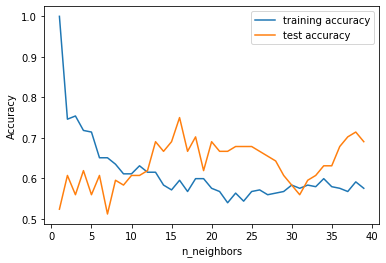

In [362]:
def knn_finder(X,y):
    training_accuracy = []
    test_accuracy = []
    max = []
    neighbors_settings = range(1, 40)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,test_size=0.25)
    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))
        print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()
    
    for n in range(10):
        max.append(training_accuracy[n] * 0.7 + test_accuracy[n] * 0.3)
    return np.argmax(max) + 1
def knn_predict(X,y):
    neighbors_settings = range(1, 20)
    r2 = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,train_size=0.75)
    for n_neighbors in neighbors_settings:
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        r2.append(reg.score(X_test, y_test))
    for n in range(19):    
        print(f"{n} R^2 score: {r2[n].round(2)}")

    
#scatter_matrix(dataset.iloc[:, 0:19],c=y,figsize=(10,10),marker ='o',
 #                      hist_kwds={'bins':20},s=60,alpha=.8);
                      
knn_finder(X,y)
knn_predict(X,y)


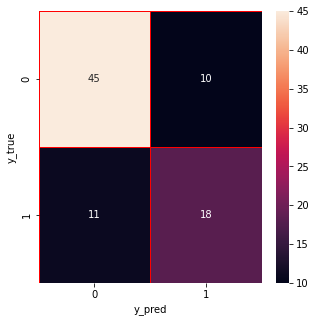

Test set predictions: [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
Test set accuracy: 0.75
Accuracy Score: 0.75


KNeighborsClassifier(n_neighbors=16)

In [365]:
from sklearn.metrics import confusion_matrix
def knn_algorithm(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,test_size=0.25)
    clf = KNeighborsClassifier(n_neighbors=16)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true=y_test
    cm = confusion_matrix(y_true, y_pred)
    
    f, ax =plt.subplots(figsize = (5,5))

    sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    scores = cross_val_score(clf,X_train,y_train,cv=12,scoring='accuracy')
    print("Test set predictions: {}".format(clf.predict(X_test)))
    print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
    #print("Cross Validation Accuracy Scores:")
    #print(scores)
    print("Accuracy Score:", accuracy_score(y_pred,y_test))
    return clf

knn_algorithm(X,y)







DecisionTreeClassifier(max_depth=39, random_state=0)

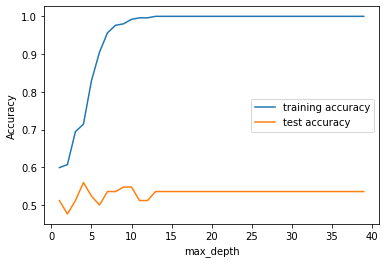

In [368]:
def treeAlgorithm(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,test_size=0.25)
    training_score = []
    test_score = []
    for i in range(1,40):
        tree = DecisionTreeClassifier(max_depth=i,random_state=0)
        tree.fit(X_train, y_train)
        test_score.append(tree.score(X_test, y_test))
        training_score.append(tree.score(X_train, y_train))
    plt.plot(range(1,40), training_score, label="training accuracy")
    plt.plot(range(1,40), test_score, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("max_depth")
    plt.legend()
    return tree
def RandomForestAlgorithm(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,train_size=0.75)
    training_score = []
    test_score = []
    for i in range(1,20):
        forest =RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 150, max_depth=i, criterion='gini')
        forest.fit(X_train, y_train)
        test_score.append(forest.score(X_test, y_test))
        training_score.append(forest.score(X_train, y_train))
        #print("Test set accuracy: {:.2f}".format(forest.score(X_test, y_test)))
    plt.plot(range(1,20), training_score, label="training accuracy")
    plt.plot(range(1,20), test_score, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("max_depth")
    plt.legend()
    return forest

treeAlgorithm(X,y)

RandomForestClassifier(max_depth=19, n_estimators=150, random_state=42)

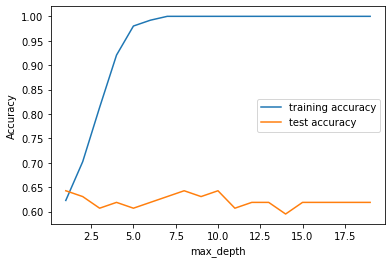

In [369]:
RandomForestAlgorithm(X,y)

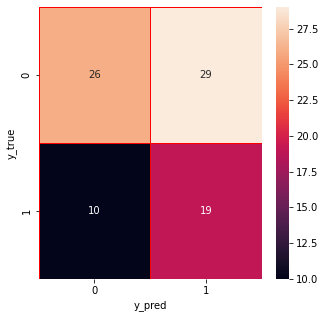

Feature importances:
[0.05031943 0.01620234 0.01512219 0.12035109 0.02290778 0.03370087
 0.         0.013826   0.13973195 0.09456108 0.06148831 0.02122084
 0.09116995 0.13014064 0.08910135 0.02592375 0.01843466 0.05579778]
Test set accuracy: 0.54


In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,train_size=0.75)
Dec_tree = DecisionTreeClassifier(max_depth=8,random_state=0)
Dec_tree.fit(X_train,y_train)
#export_graphviz(Dec_tree, out_file="tree.dot", class_names=["Not Succesfull", "Succesfull"],
# feature_names=dataset.columns[0:18], impurity=False, filled=True)
y_pred = Dec_tree.predict(X_test)
y_true=y_test
cm = confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print("Feature importances:\n{}".format(Dec_tree.feature_importances_))
print("Test set accuracy: {:.2f}".format(Dec_tree.score(X_test, y_test)))
#import graphviz
#with open("tree.dot") as f:
# dot_graph = f.read()
#graphviz.Source(dot_graph)


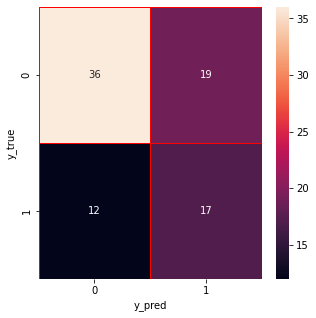

Test set accuracy: 0.63
Feature importances:
[0.05374469 0.043196   0.04585481 0.05147432 0.05468391 0.04513419
 0.05046024 0.04975049 0.07385002 0.05800251 0.05128109 0.04331608
 0.07680583 0.05759286 0.07639189 0.05489927 0.05575925 0.05780255]


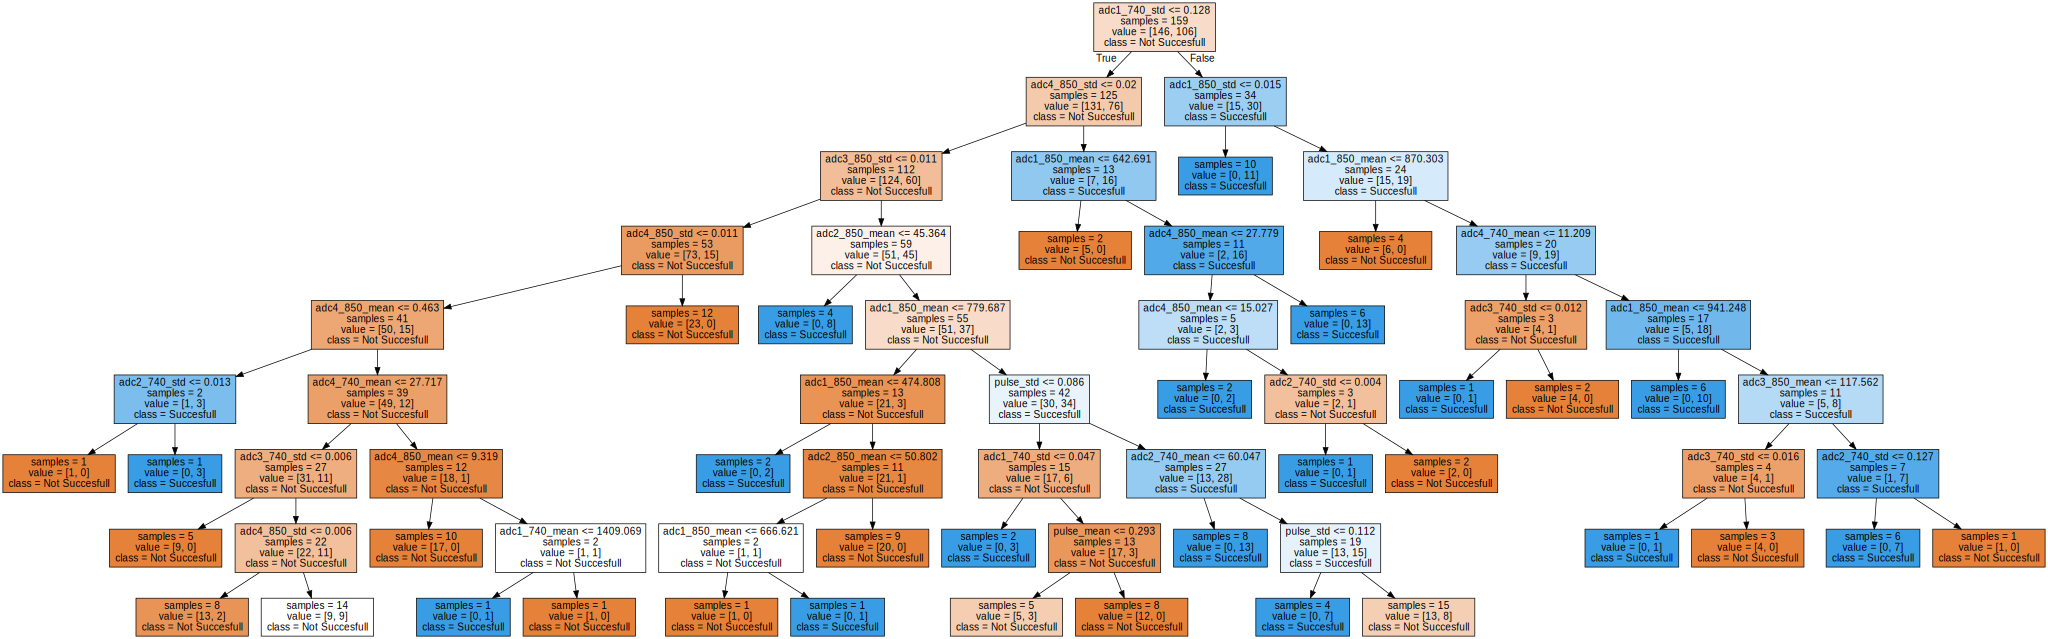

In [371]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,train_size = 0.75)
Forest_tree  =RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
Forest_tree.fit(X_train,y_train)
y_pred = Forest_tree.predict(X_test)
y_true=y_test
cm = confusion_matrix(y_true, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print("Test set accuracy: {:.2f}".format(Forest_tree.score(X_test, y_test)))
estimator = Forest_tree.estimators_[5]
export_graphviz(estimator, out_file="forest.dot", class_names=["Not Succesfull", "Succesfull"],
 feature_names=dataset.columns[0:18], impurity=False, filled=True)
print("Feature importances:\n{}".format(Forest_tree.feature_importances_))

import graphviz
with open("forest.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)


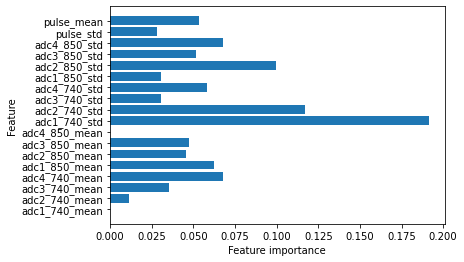

In [372]:
def feature_importance_tree(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.825)
    dec_tree = DecisionTreeClassifier(max_depth=12,random_state=0)
    dec_tree.fit(X_train, y_train)
    plt.barh(range(18), dec_tree.feature_importances_, align='center')
    plt.yticks(np.arange(18), dataset.columns[0:18])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

feature_importance_tree (X,y)

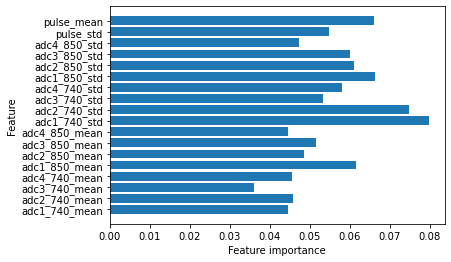

In [373]:
def feature_importance_forest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.825)
    forest = RandomForestClassifier(n_estimators=150,max_depth=8,random_state=0)
    forest.fit(X_train, y_train)
    plt.barh(range(18), forest.feature_importances_, align='center')
    plt.yticks(np.arange(18), dataset.columns[0:18])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
feature_importance_forest(X,y)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4,train_size=0.75)
rfc=RandomForestClassifier(random_state=0)
knn = KNeighborsClassifier()
param_grid = { 
    'n_estimators': [100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10,11],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [138]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 100}